1) Download the dataset provided in the link below.

Credit_Card_Applications.csv

2) Without using the ‘class’ column, predict the fraudsters.

3) Print the customer ids with the probability of their being a fraudster.

(It’s an unsupervised deep learning model so take use of SOM for the
following task.)

Use the MINISOM library for getting SOM.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
print(dataset.head())
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print("\nValues in X:\n", X)
print("\nValues in y:\n", y)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
print("\nTransformed values of X:\n", X)

   CustomerID  A1     A2     A3  A4  A5  ...  A10  A11  A12  A13   A14  Class
0    15776156   1  22.08  11.46   2   4  ...    0    1    2  100  1213      0
1    15739548   0  22.67   7.00   2   8  ...    0    0    2  160     1      0
2    15662854   0  29.58   1.75   1   4  ...    0    1    2  280     1      0
3    15687688   0  21.67  11.50   1   5  ...   11    1    2    0     1      1
4    15715750   1  20.17   8.17   2   6  ...   14    0    2   60   159      1

[5 rows x 16 columns]

Values in X:
 [[1.5776156e+07 1.0000000e+00 2.2080000e+01 ... 2.0000000e+00
  1.0000000e+02 1.2130000e+03]
 [1.5739548e+07 0.0000000e+00 2.2670000e+01 ... 2.0000000e+00
  1.6000000e+02 1.0000000e+00]
 [1.5662854e+07 0.0000000e+00 2.9580000e+01 ... 2.0000000e+00
  2.8000000e+02 1.0000000e+00]
 ...
 [1.5675450e+07 0.0000000e+00 1.8830000e+01 ... 2.0000000e+00
  1.0000000e+02 1.0000000e+00]
 [1.5776494e+07 0.0000000e+00 2.7420000e+01 ... 2.0000000e+00
  1.2000000e+02 1.2000000e+01]
 [1.5592412e+07 1.000000

In [4]:
pip install minisom

  Created wheel for minisom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=514cc8361e357aeee135ff35552a4026aa8f867866e2dc5483cbe682d1c7d8cc
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built minisom


In [5]:
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

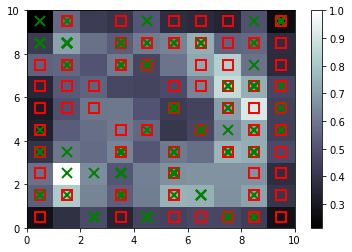

In [6]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['s', 'x']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [7]:
mappings = som.win_map(X)
print("\nMappings are:\n", mappings)
frauds = np.concatenate((mappings[(1,2)], mappings[(6,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)
print("\n\n\n\nFrauds customers are:\n",frauds)


Mappings are:
 defaultdict(<class 'list'>, {(8, 8): [array([0.84268147, 1.        , 0.12526316, 0.40928571, 0.5       ,
       0.23076923, 0.375     , 0.05561404, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.05      , 0.01212   ]), array([0.72114172, 1.        , 0.15533835, 0.32142857, 0.5       ,
       0.38461538, 0.375     , 0.00877193, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.        , 0.        ]), array([0.89100585, 1.        , 0.09398496, 0.39446429, 0.5       ,
       0.53846154, 0.375     , 0.07017544, 0.        , 0.        ,
       0.        , 1.        , 0.5       , 0.068     , 0.        ]), array([0.7907772 , 1.        , 0.13413534, 0.00589286, 0.5       ,
       0.53846154, 0.25      , 0.07894737, 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ]), array([0.7976967 , 1.        , 0.13157895, 0.41071429, 0.        ,
       0.46153846, 0.375     , 0.05263158, 0.        , 0.        ,


In [8]:
customers = dataset.iloc[:,1:].values
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
    if dataset.iloc[i, 0] in frauds:
        is_fraud[i] = 1

In [9]:
print(is_fraud)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0.

In [10]:
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()
classifier.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'relu', input_dim = 15))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(customers, is_fraud, batch_size = 1, epochs = 5)
y_pred = classifier.predict(customers)
y_pred = np.concatenate((dataset.iloc[:,0:1].values, y_pred), axis = 1)
y_pred = y_pred[y_pred[:,1].argsort()]

Epoch 1/5
690/690 [==============================] - 1s 1ms/step - loss: 0.1364 - accuracy: 0.9884
Epoch 2/5
690/690 [==============================] - 1s 1ms/step - loss: 0.0887 - accuracy: 0.9884
Epoch 3/5
690/690 [==============================] - 1s 1ms/step - loss: 0.0807 - accuracy: 0.9884
Epoch 4/5
690/690 [==============================] - 1s 1ms/step - loss: 0.0743 - accuracy: 0.9884
Epoch 5/5
690/690 [==============================] - 1s 1ms/step - loss: 0.0701 - accuracy: 0.9884


In [11]:
df = pd.DataFrame(y_pred, columns=['Customers','Fraud_probability'])
df

,Customers,Fraud_probability
0,15762716.0,0.000000
1,15664615.0,0.000000
2,15708714.0,0.000000
3,15790113.0,0.000000
4,15598802.0,0.000000
...,...,...
685,15715750.0,0.106139
686,15667588.0,0.112987
687,15621423.0,0.113388
688,15815040.0,0.121899
